# Plot zostoga from CMIP5 and CMIP6

In [22]:
import sys

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../code/')
import mod_loc as loc

In [23]:
data_dir = '../outputs/'

In [24]:
cmip6 = xr.open_dataset(data_dir+'CMIP6_SeaLevel_ssp585_zostoga_1986_2100.nc')
cmip6

<xarray.Dataset>
Dimensions:            (model: 14, time: 114)
Coordinates:
  * model              (model) object 'MIROC6' 'MPI-ESM1-2-HR' ... 'MRI-ESM2-0'
  * time               (time) float64 1.986e+03 1.988e+03 ... 2.098e+03 2.1e+03
Data variables:
    zostoga_corrected  (model, time) float64 ...
    trend_piControl    (model, time) float64 ...
Attributes:
    source_file:    This NetCDF file was built from ComputeGlobalThermalExpan...
    creation_date:  2020-08-23 09:45

In [25]:
loc.print_results_da(cmip6.zostoga_corrected)

Mean and 5-95 percentile range: 
Year 2099
0.3166168706613754 [ 0.23171150795777806 - 0.4015222333649727 ]
Year 2081-2099
0.26982969487561004 [ 0.19887803325977574 - 0.3407813564914443 ]


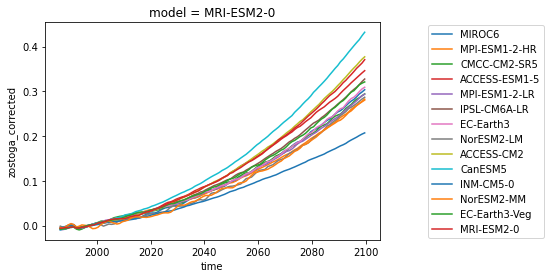

In [26]:
fig, axes = plt.subplots(ncols=1)
for mod in cmip6.model:
    cmip6.zostoga_corrected.sel(model=mod).plot(ax=axes, label=mod.values)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

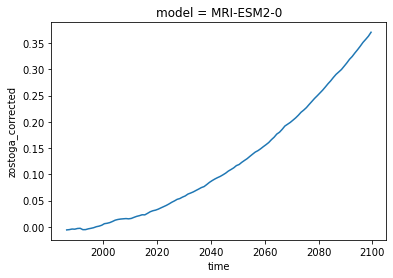

In [27]:
cmip6.zostoga_corrected.sel(model='MRI-ESM2-0').plot()

In [28]:
cmip6['zostoga_corrected'] = xr.where((cmip6.zostoga_corrected.coords['model'] == 'MRI-ESM2-0') & 
                                      (cmip6.zostoga_corrected.coords['time'] >= 2050), 
                                      cmip6.zostoga_corrected+0.02, cmip6.zostoga_corrected)


In [ ]:
cmip6['zostoga_corrected'] = xr.where((cmip6.zostoga_corrected.coords['model'] == 'MRI-ESM2-0') & 
                                      (cmip6.zostoga_corrected.coords['time'] >= 2050), 
                                      cmip6.zostoga_corrected+0.02, cmip6.zostoga_corrected)

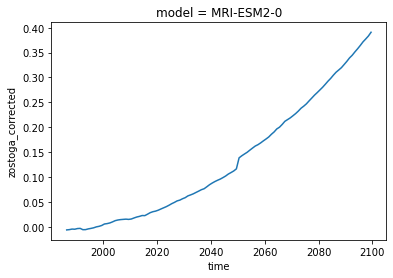

In [29]:
cmip6.zostoga_corrected.sel(model='MRI-ESM2-0').plot()

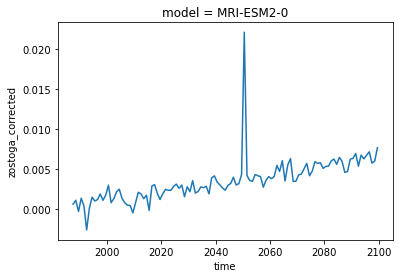

In [30]:
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').diff('time').plot()

In [33]:
diff = cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').diff('time')
ind = np.where( diff > 0.02)[0][0]
ind

63

In [49]:
#cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0')[cmip6.time>cmip6.time[ind]]
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0')[ind:]

<xarray.DataArray 'zostoga_corrected' (time: 51)>
array([0.11653829, 0.13863109, 0.14280324, 0.14636646, 0.1498163 ,
       0.15413342, 0.15829076, 0.16232758, 0.16504695, 0.16863198,
       0.17267567, 0.17646176, 0.18051375, 0.18595428, 0.19065007,
       0.19668336, 0.20018228, 0.20568579, 0.21198362, 0.21543387,
       0.21890596, 0.22316928, 0.22753318, 0.23255991, 0.2382532 ,
       0.24240964, 0.24713626, 0.25305844, 0.25875176, 0.26453737,
       0.26960961, 0.27493318, 0.2802835 , 0.28630068, 0.29253971,
       0.29812411, 0.30457527, 0.31050728, 0.31507923, 0.31976711,
       0.32599296, 0.33231717, 0.33925286, 0.34461135, 0.35134611,
       0.35761101, 0.36432354, 0.37146606, 0.37719452, 0.38317713,
       0.39083761])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * time     (time) float64 2.05e+03 2.05e+03 2.052e+03 ... 2.098e+03 2.1e+03

In [51]:
cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').isel(time=slice(ind+1,None))

<xarray.DataArray 'zostoga_corrected' (time: 50)>
array([0.13863109, 0.14280324, 0.14636646, 0.1498163 , 0.15413342,
       0.15829076, 0.16232758, 0.16504695, 0.16863198, 0.17267567,
       0.17646176, 0.18051375, 0.18595428, 0.19065007, 0.19668336,
       0.20018228, 0.20568579, 0.21198362, 0.21543387, 0.21890596,
       0.22316928, 0.22753318, 0.23255991, 0.2382532 , 0.24240964,
       0.24713626, 0.25305844, 0.25875176, 0.26453737, 0.26960961,
       0.27493318, 0.2802835 , 0.28630068, 0.29253971, 0.29812411,
       0.30457527, 0.31050728, 0.31507923, 0.31976711, 0.32599296,
       0.33231717, 0.33925286, 0.34461135, 0.35134611, 0.35761101,
       0.36432354, 0.37146606, 0.37719452, 0.38317713, 0.39083761])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * time     (time) float64 2.05e+03 2.052e+03 2.052e+03 ... 2.098e+03 2.1e+03

In [95]:
def remove_discontinuities_da(da, gap):
    '''Remove discontinuities in a time series, numpy or data array.
    da: The input data
    gap: the maximum gap allowed in the data above which the 
    discontinuity is removed'''
    
    diff = da.diff('time')
    indpb = np.where(np.abs(diff) > gap)[0]
    if len(indpb) > 0:
        print("### Removing discontinuities at these indices: ####")
        print(indpb)
        for k in indpb:
            da[k+1:] = da[k+1:] - da[k+1] + da[k]
    return da

def remove_discontinuities(da, gap):
    '''Remove discontinuities in a time series, numpy or data array.
    da: The input data
    gap: the maximum gap allowed in the data above which the 
    discontinuity is removed'''
    
    da_out = da.copy()
    if isinstance(da, xr.DataArray):
        # Make sure to load the data, Dask arrays do not support item assigment
        da_out.load()
        diff = da.diff('time')
    elif isinstance(da, np.ndarray):
        diff = np.array(da[1:]) - np.array(da[:-1])
    else:
        print('ERROR: Input object type not supported')
        
    indpb = np.where(np.abs(diff) > gap)[0]
    if len(indpb) > 0:
        print("### Removing discontinuities at these indices: ####")
        print(indpb)
        for k in indpb:
            da_out[k+1:] = da[k+1:] - da[k+1] + da[k]
    return da_out

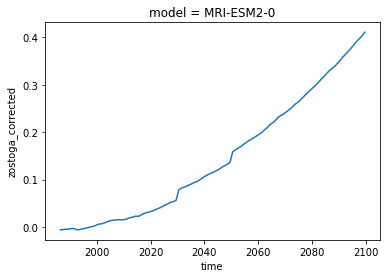

In [100]:
test_da = cmip6['zostoga_corrected'].sel(model='MRI-ESM2-0').copy()
test_da.plot()

In [101]:
new_da = remove_discontinuities_da(test_da, 0.02)

### Removing discontinuities at these indices: ####
[43 63]


In [98]:
new_da

<xarray.DataArray 'zostoga_corrected' (time: 114)>
array([-6.06478165e-03, -5.47227795e-03, -4.37783981e-03, -4.68344772e-03,
       -3.33758602e-03, -2.97055924e-03, -5.58655867e-03, -5.48833021e-03,
       -4.01694857e-03, -3.02088418e-03, -1.84382282e-03,  3.66813699e-05,
        1.12228684e-03,  2.83811831e-03,  5.81529208e-03,  6.60101914e-03,
        7.89715567e-03,  1.00394844e-02,  1.25129990e-02,  1.38502851e-02,
        1.46442115e-02,  1.51130653e-02,  1.55491553e-02,  1.50628969e-02,
        1.58554375e-02,  1.79386384e-02,  1.98184386e-02,  2.11001210e-02,
        2.28162765e-02,  2.26293303e-02,  2.55000278e-02,  2.85527132e-02,
        3.04894805e-02,  3.16719360e-02,  3.35621297e-02,  3.60169656e-02,
        3.83533224e-02,  4.06999238e-02,  4.35280114e-02,  4.66361217e-02,
        4.92216259e-02,  5.22155635e-02,  5.37495971e-02,  5.65253370e-02,
        5.65253370e-02,  6.00747004e-02,  6.20670490e-02,  6.42536789e-02,
        6.70045041e-02,  6.96691707e-02,  7.25022279e-02,  7.43951410e-02,
        7.82865234e-02,  8.24259803e-02,  8.58031385e-02,  8.88292849e-02,
        9.14539047e-02,  9.37990085e-02,  9.67672639e-02,  9.99541939e-02,
        1.03921855e-01,  1.06925814e-01,  1.10088231e-01,  1.14372438e-01,
        1.36538288e-01,  1.40710439e-01,  1.44273668e-01,  1.47723499e-01,
        1.52040622e-01,  1.56197960e-01,  1.60234778e-01,  1.62954154e-01,
        1.66539184e-01,  1.70582871e-01,  1.74368962e-01,  1.78420949e-01,
        1.83861486e-01,  1.88557277e-01,  1.94590568e-01,  1.98089483e-01,
        2.03592992e-01,  2.09890823e-01,  2.13341071e-01,  2.16813165e-01,
        2.21076480e-01,  2.25440378e-01,  2.30467110e-01,  2.36160400e-01,
        2.40316845e-01,  2.45043467e-01,  2.50965639e-01,  2.56658959e-01,
        2.62444577e-01,  2.67516817e-01,  2.72840380e-01,  2.78190705e-01,
        2.84207887e-01,  2.90446918e-01,  2.96031310e-01,  3.02482474e-01,
        3.08414481e-01,  3.12986429e-01,  3.17674308e-01,  3.23900166e-01,
        3.30224372e-01,  3.37160061e-01,  3.42518552e-01,  3.49253315e-01,
        3.55518214e-01,  3.62230743e-01,  3.69373261e-01,  3.75101718e-01,
        3.81084330e-01,  3.88744812e-01])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * time     (time) float64 1.986e+03 1.988e+03 1.988e+03 ... 2.098e+03 2.1e+03

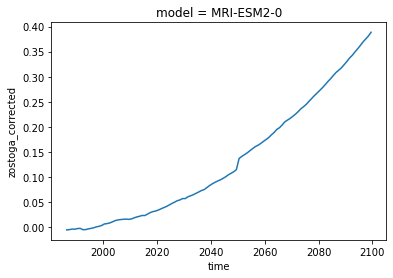

In [99]:
new_da.plot()

In [104]:
new_da = new_da.rename({'time':'year'})
new_da

<xarray.DataArray 'zostoga_corrected' (year: 114)>
array([-6.06478165e-03, -5.47227795e-03, -4.37783981e-03, -4.68344772e-03,
       -3.33758602e-03, -2.97055924e-03, -5.58655867e-03, -5.48833021e-03,
       -4.01694857e-03, -3.02088418e-03, -1.84382282e-03,  3.66813699e-05,
        1.12228684e-03,  2.83811831e-03,  5.81529208e-03,  6.60101914e-03,
        7.89715567e-03,  1.00394844e-02,  1.25129990e-02,  1.38502851e-02,
        1.46442115e-02,  1.51130653e-02,  1.55491553e-02,  1.50628969e-02,
        1.58554375e-02,  1.79386384e-02,  1.98184386e-02,  2.11001210e-02,
        2.28162765e-02,  2.26293303e-02,  2.55000278e-02,  2.85527132e-02,
        3.04894805e-02,  3.16719360e-02,  3.35621297e-02,  3.60169656e-02,
        3.83533224e-02,  4.06999238e-02,  4.35280114e-02,  4.66361217e-02,
        4.92216259e-02,  5.22155635e-02,  5.37495971e-02,  5.65253370e-02,
        5.65253370e-02,  6.00747004e-02,  6.20670490e-02,  6.42536789e-02,
        6.70045041e-02,  6.96691707e-02,  7.25022279e-02,  7.43951410e-02,
        7.82865234e-02,  8.24259803e-02,  8.58031385e-02,  8.88292849e-02,
        9.14539047e-02,  9.37990085e-02,  9.67672639e-02,  9.99541939e-02,
        1.03921855e-01,  1.06925814e-01,  1.10088231e-01,  1.14372438e-01,
        1.14372438e-01,  1.18544588e-01,  1.22107817e-01,  1.25557648e-01,
        1.29874772e-01,  1.34032110e-01,  1.38068928e-01,  1.40788304e-01,
        1.44373334e-01,  1.48417021e-01,  1.52203111e-01,  1.56255099e-01,
        1.61695635e-01,  1.66391427e-01,  1.72424717e-01,  1.75923633e-01,
        1.81427142e-01,  1.87724973e-01,  1.91175221e-01,  1.94647314e-01,
        1.98910630e-01,  2.03274528e-01,  2.08301260e-01,  2.13994550e-01,
        2.18150994e-01,  2.22877617e-01,  2.28799789e-01,  2.34493109e-01,
        2.40278727e-01,  2.45350967e-01,  2.50674529e-01,  2.56024855e-01,
        2.62042037e-01,  2.68281067e-01,  2.73865460e-01,  2.80316623e-01,
        2.86248630e-01,  2.90820579e-01,  2.95508458e-01,  3.01734316e-01,
        3.08058521e-01,  3.14994211e-01,  3.20352702e-01,  3.27087464e-01,
        3.33352363e-01,  3.40064893e-01,  3.47207411e-01,  3.52935868e-01,
        3.58918479e-01,  3.66578961e-01])
Coordinates:
    model    <U10 'MRI-ESM2-0'
  * year     (year) float64 1.986e+03 1.988e+03 1.988e+03 ... 2.098e+03 2.1e+03

In [75]:
isinstance(a, np.ndarray)

True

In [74]:
type(a)

numpy.ndarray

In [7]:
xr.__version__

'0.16.0'

In [8]:
attrs = {'units': 'hours since 2000-01-01'}
ds = xr.Dataset({'time': ('time', [0, 1, 2, 3], attrs)})

In [9]:
xr.decode_cf(ds)

<xarray.Dataset>
Dimensions:  (time: 4)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-01-01T03:00:00
Data variables:
    *empty*

In [11]:
a = 2
b = 3
if [a,b] == [2,3]:
    print('yes')

yes


In [12]:
a = np.array([1,2,3])
w = np.where(a >= 4)
w

(array([], dtype=int64),)

In [16]:
len(w[0])

0

In [20]:
del(w)

In [21]:
try:
    print('yes')

NameError: name 'w' is not defined

In [52]:
test_data = '../code/zos_Omon_BCC-CSM2-MR_ssp585_r1i1p1f1_gn_201501-210012.nc'

In [53]:
bcc_ds = xr.open_dataset(test_data, use_cftime=True)
bcc_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 232, lon: 360, time: 1032)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    latitude   (lat, lon) float32 ...
    longitude  (lat, lon) float32 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2015.0
    comment:                This is an extension of historical simulation (r1...
    contact:                Dr. Tongwen Wu(twwu@cma.gov.cn)
    creation_date:          2019-04-29T08:20:17Z
    data_specs_version:     01.00.27
    description:            SSP5-8.5
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-CSM2...
    grid:                   native ocean tri-polar grid
    grid_label:             gn
    history:                2019-04-29T08:20:16Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Beijing Climate Center, Beijing 100081, China
    institution_id:         BCC
    mip_era:                CMIP6
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       BCC-CSM2-MR
    parent_time_units:      days since 2015-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  ocean
    references:             Model described by Tongwen Wu et al. (JGR 2013; J...
    run_variant:            forcing: greenhouse gases,solar constant,aerosol,...
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    source_id:              BCC-CSM2-MR
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    table_info:             Creation Date:(30 July 2018) MD5:e53ff52009d0b97d...
    title:                  BCC-CSM2-MR output prepared for CMIP6
    tracking_id:            hdl:21.14100/2e27d87b-4dc1-4463-99a5-bf4667809d72
    variable_id:            zos
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by BCC is licensed unde...
    cmor_version:           3.3.2

In [55]:
y_ds = loc.yearly_mean(bcc_ds)
y_ds = y_ds.rename({'lat':'rlat', 'lon':'rlon'})
y_ds = y_ds.rename({'latitude':'lat', 'longitude':'lon'})


/Users/dewilebars/anaconda3/envs/p38ds/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [61]:
y_ds.zos[0,0,0]

<xarray.DataArray 'zos' ()>
array(0., dtype=float32)
Coordinates:
    lon      float32 0.5
    lat      float32 -81.5
    rlat     float64 -81.5
    rlon     float64 0.5
    time     float64 2.016e+03